In [84]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')
def customaxis(ax, c_left='k', c_bottom='k', c_right='none', c_top='none',
               lw=3, size=12, pad=8):

    for c_spine, spine in zip([c_left, c_bottom, c_right, c_top],
                              ['left', 'bottom', 'right', 'top']):
        if c_spine != 'none':
            ax.spines[spine].set_color(c_spine)
            ax.spines[spine].set_linewidth(lw)
        else:
            ax.spines[spine].set_color('none')
    if (c_bottom == 'none') & (c_top == 'none'): # no bottom and no top
        ax.xaxis.set_ticks_position('none')
    elif (c_bottom != 'none') & (c_top != 'none'): # bottom and top
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                      color=c_bottom, labelsize=size, pad=pad)
    elif (c_bottom != 'none') & (c_top == 'none'): # bottom but not top
        ax.xaxis.set_ticks_position('bottom')
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                       color=c_bottom, labelsize=size, pad=pad)
    elif (c_bottom == 'none') & (c_top != 'none'): # no bottom but top
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', direction='out', width=lw, length=7,
                       color=c_top, labelsize=size, pad=pad)
    if (c_left == 'none') & (c_right == 'none'): # no left and no right
        ax.yaxis.set_ticks_position('none')
    elif (c_left != 'none') & (c_right != 'none'): # left and right
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_left, labelsize=size, pad=pad)
    elif (c_left != 'none') & (c_right == 'none'): # left but not right
        ax.yaxis.set_ticks_position('left')
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_left, labelsize=size, pad=pad)
    elif (c_left == 'none') & (c_right != 'none'): # no left but right
        ax.yaxis.set_ticks_position('right')
        ax.tick_params(axis='y', direction='out', width=lw, length=7,
                       color=c_right, labelsize=size, pad=pad)

## Effective population size run-time

In [91]:
nestats = []
runs = list(range(32,43))
for i in runs:
    bench = glob.glob('./benchmarks/impute2/run' + str(i) +'/snp50.chr20.*.benchmark.txt')
    chrom = []
    for xx in bench:
        df = pd.read_table(xx, index_col = None, header = 0)
        #run = xx.split('/')[2].strip('run')
        df = df[['s', 'mean_load']]
        #df['run'] = int(run)/14
        chrom.append(df)
    combined = pd.concat(chrom)
    sum = pd.DataFrame(combined.sum())
    stats = sum.transpose()
    nestats.append(stats)
neperm = pd.concat(nestats)
values = [50,100,250,500,1000,2500,5000,10000,20000,25000,29999]
neperm.index = values

In [92]:
neperm.head()

,s,mean_load
50,418.3979,324.41
100,497.0795,0.00
250,515.7844,0.00
500,494.5153,0.00
1000,501.5720,0.00


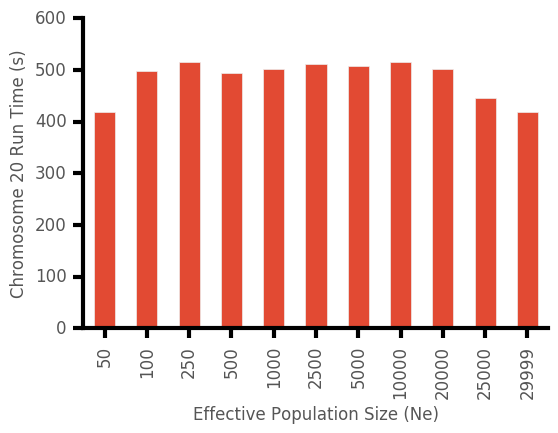

In [126]:
ax = neperm.s.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('Effective Population Size (Ne)')
ax.set_ylabel('Chromosome 20 Run Time (s)')

## Call threshold run times

In [89]:
ctstats = []
runs = list(range(43,53))
for i in runs:
    bench = glob.glob('./impute2/run' + str(i) +'/snp50.chr20.*.benchmark.txt')
    chrom = []
    for xx in bench:
        df = pd.read_table(xx, index_col = None, header = 0)
        #run = xx.split('/')[2].strip('run')
        df = df[['s', 'mean_load']]
        #df['run'] = int(run)/14
        chrom.append(df)
    combined = pd.concat(chrom)
    sum = pd.DataFrame(combined.sum())
    stats = sum.transpose()
    ctstats.append(stats)
ctperm = pd.concat(ctstats)
values = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
ctperm.index = values

ValueError: No objects to concatenate

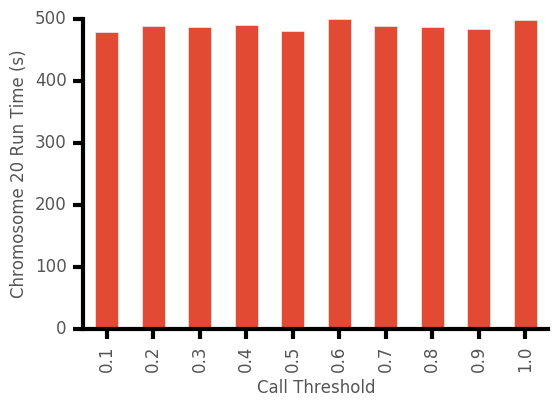

In [141]:
ax = ctperm.s.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('Call Threshold')
ax.set_ylabel('Chromosome 20 Run Time (s)')

## k_haps run times

In [144]:
khapsstats = []
runs = list(range(53,62))
for i in runs:
    bench = glob.glob('./impute2/run' + str(i) +'/snp50.chr20.*.benchmark.txt')
    chrom = []
    for xx in bench:
        df = pd.read_table(xx, index_col = None, header = 0)
        #run = xx.split('/')[2].strip('run')
        df = df[['s', 'mean_load']]
        #df['run'] = int(run)/14
        chrom.append(df)
    combined = pd.concat(chrom)
    sum = pd.DataFrame(combined.sum())
    stats = sum.transpose()
    khapsstats.append(stats)
khapsperm = pd.concat(khapsstats)
values = [50, 100, 200, 300, 400, 500, 600, 700, 800]
khapsperm.index = values

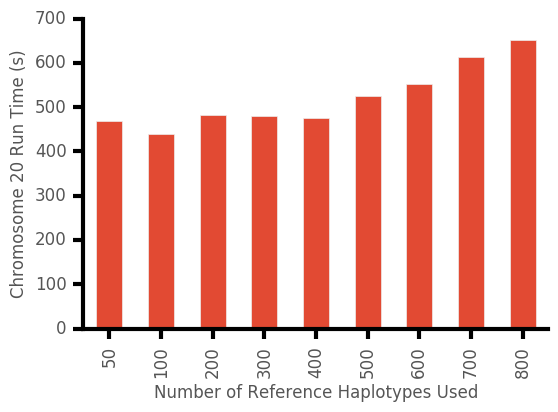

In [148]:
ax = khapsperm.s.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('Number of Reference Haplotypes Used')
ax.set_ylabel('Chromosome 20 Run Time (s)')

## k run times

In [147]:
kstats = []
runs = list(range(62,71))
for i in runs:
    bench = glob.glob('./impute2/run' + str(i) +'/snp50.chr20.*.benchmark.txt')
    chrom = []
    for xx in bench:
        df = pd.read_table(xx, index_col = None, header = 0)
        #run = xx.split('/')[2].strip('run')
        df = df[['s', 'mean_load']]
        #df['run'] = int(run)/14
        chrom.append(df)
    combined = pd.concat(chrom)
    sum = pd.DataFrame(combined.sum())
    stats = sum.transpose()
    kstats.append(stats)
kperm = pd.concat(kstats)
values = [20, 50, 80, 100, 200, 300, 400, 800, 1000]
kperm.index = values

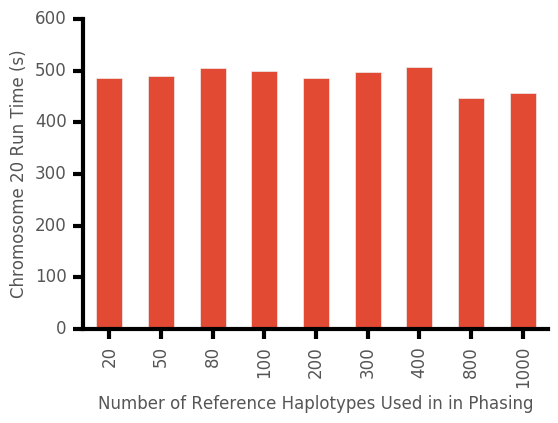

In [149]:
ax = kperm.s.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('Number of Reference Haplotypes Used in in Phasing')
ax.set_ylabel('Chromosome 20 Run Time (s)')

## MCMC iteration run times

In [150]:
iterstats = []
runs = list(range(71,76))
for i in runs:
    bench = glob.glob('./impute2/run' + str(i) +'/snp50.chr20.*.benchmark.txt')
    chrom = []
    for xx in bench:
        df = pd.read_table(xx, index_col = None, header = 0)
        #run = xx.split('/')[2].strip('run')
        df = df[['s', 'mean_load']]
        #df['run'] = int(run)/14
        chrom.append(df)
    combined = pd.concat(chrom)
    sum = pd.DataFrame(combined.sum())
    stats = sum.transpose()
    iterstats.append(stats)
iterperm = pd.concat(iterstats)
values = [11, 20, 50, 100, 150]
iterperm.index = values

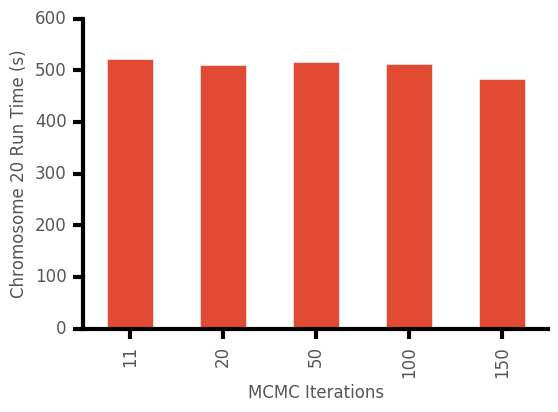

In [151]:
ax = iterperm.s.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('MCMC Iterations')
ax.set_ylabel('Chromosome 20 Run Time (s)')

## Burn-in iteration run times

In [154]:
burnstats = []
runs = list(range(76,81))
for i in runs:
    bench = glob.glob('./impute2/run' + str(i) +'/snp50.chr20.*.benchmark.txt')
    chrom = []
    for xx in bench:
        df = pd.read_table(xx, index_col = None, header = 0)
        #run = xx.split('/')[2].strip('run')
        df = df[['s', 'mean_load']]
        #df['run'] = int(run)/14
        chrom.append(df)
    combined = pd.concat(chrom)
    sum = pd.DataFrame(combined.sum())
    stats = sum.transpose()
    burnstats.append(stats)
burnperm = pd.concat(burnstats)
values = [0, 5, 10, 20, 29]
burnperm.index = values

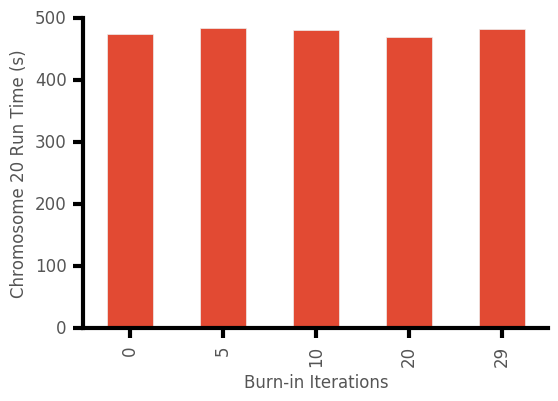

In [155]:
ax = burnperm.s.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('Burn-in Iterations')
ax.set_ylabel('Chromosome 20 Run Time (s)')

In [5]:
accuracies = (pd.read_table('./imp_acc/permutations.chr20.accuracies.txt', header = None))

In [95]:
accdict = {}
with open ('./imp_acc/permutations.chr20.accuracies.txt', 'r') as perm:
    for line in perm:
        run = line.split()[0].strip('run')
        impacc = line.split()[1]
        accdict[run]=float(impacc)

In [96]:
runacc = (pd.DataFrame(accdict, index = [0])
        .transpose()
         .drop(['81', '82'])
         )

In [97]:
runacc.index = [50,100,250,500,1000,2500,5000,10000,20000,25000,29999,.1, .2, .3, .4, .5, .6, .7, .8, .9, 1,50, 100, 200, 300, 400, 500, 600, 700, 800,20, 50, 80, 100, 200, 300, 400, 800, 1000,11, 20, 50, 100, 150,0, 5, 10, 20, 29]

In [98]:
runacc.columns = ['imp_acc']
runacc['run'] = list(range(32, 81))

In [136]:
ne = (runacc.iloc[:11])
ne.index = ne.index.astype(int)

ct = runacc.iloc[11:21]

kh = runacc.iloc[21:30]
kh.index = kh.index.astype(int)

k = runacc.iloc[30:39]
k.index = k.index.astype(int)

iter = runacc.iloc[39:44]
iter.index = iter.index.astype(int)

burn = runacc.iloc[44:]
burn.index = burn.index.astype(int)

## Effective population size imputation accuracy

(0.95, 1)

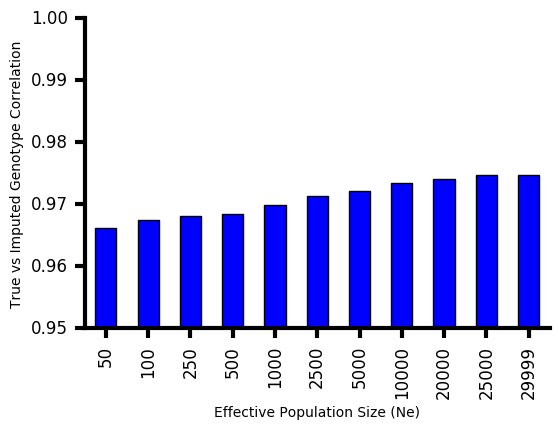

In [148]:
ax = ne.imp_acc.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('Effective Population Size (Ne)')
ax.set_ylabel('True vs Imputed Genotype Correlation')
ax.set_ylim(0.95, 1)

## Call threshold imputation accuracy

(0.95, 1)

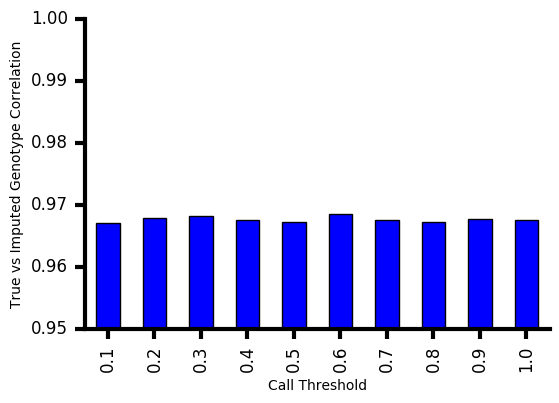

In [141]:
ax = ct.imp_acc.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('Call Threshold')
ax.set_ylabel('True vs Imputed Genotype Correlation')
ax.set_ylim(0.95, 1)

(0.94, 1)

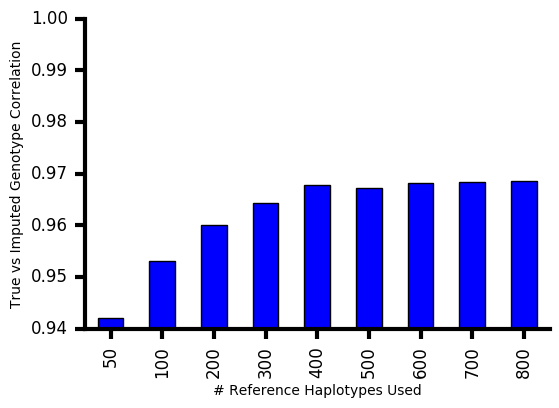

In [144]:
ax = kh.imp_acc.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('# Reference Haplotypes Used')
ax.set_ylabel('True vs Imputed Genotype Correlation')
ax.set_ylim(0.94, 1)

(0.95, 1)

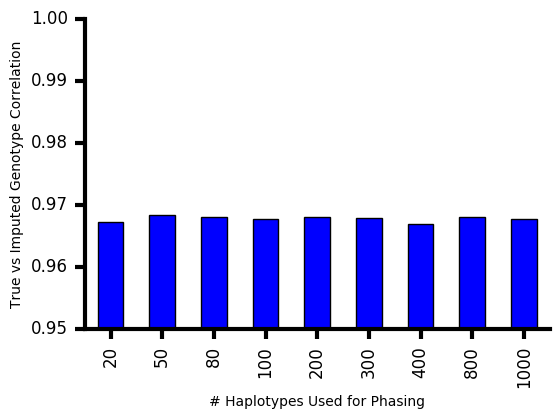

In [146]:
ax = k.imp_acc.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('# Haplotypes Used for Phasing')
ax.set_ylabel('True vs Imputed Genotype Correlation')
ax.set_ylim(0.95, 1)

(0.95, 1)

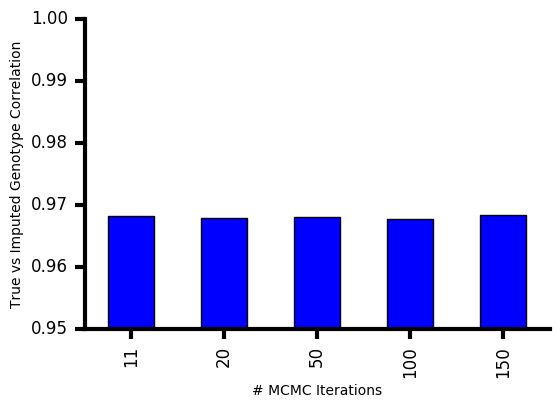

In [149]:
ax = iter.imp_acc.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('# MCMC Iterations')
ax.set_ylabel('True vs Imputed Genotype Correlation')
ax.set_ylim(0.95, 1)

(0.95, 1)

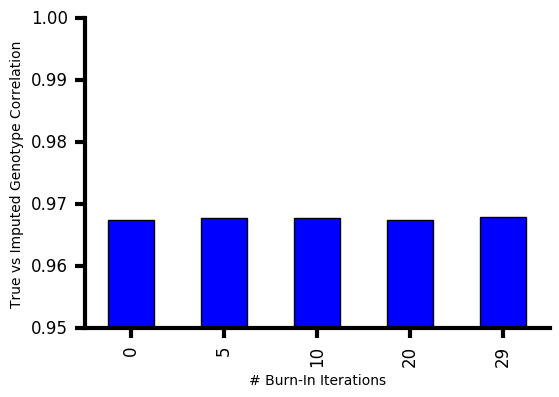

In [150]:
ax = burn.imp_acc.plot(kind='bar')
customaxis(ax, c_left = 'k', c_bottom = 'k', c_top = 'none', c_right = 'none')
ax.set_axis_bgcolor('white')
ax.set_xlabel('# Burn-In Iterations')
ax.set_ylabel('True vs Imputed Genotype Correlation')
ax.set_ylim(0.95, 1)